Import Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import save
from numpy import load
from sklearn.metrics import classification_report,confusion_matrix

Load data as numpy

In [2]:
X_train = load(r'D:\Year3\Computer Intelligence\Project\X_train_new.npy')
y_train = load(r'D:\Year3\Computer Intelligence\Project\y_train_new.npy')

X_test = load(r'D:\Year3\Computer Intelligence\Project\X_test_new.npy')
y_test = load(r'D:\Year3\Computer Intelligence\Project\y_test_new.npy')

X_val = load(r'D:\Year3\Computer Intelligence\Project\X_val_new.npy')
y_val = load(r'D:\Year3\Computer Intelligence\Project\y_val_new.npy')

Display shape of data

In [3]:
print("X_train Shape :", X_train.shape)
print("X_test Shape :", X_test.shape)
print("X_val Shape :", X_val.shape)
print("y_train Shape :", y_train.shape)
print("y_test Shape :", y_test.shape)
print("y_val Shape :", y_val.shape)

X_train Shape : (7000, 48, 64)
X_test Shape : (500, 48, 64)
X_val Shape : (1000, 48, 64)
y_train Shape : (7000,)
y_test Shape : (500,)
y_val Shape : (1000,)


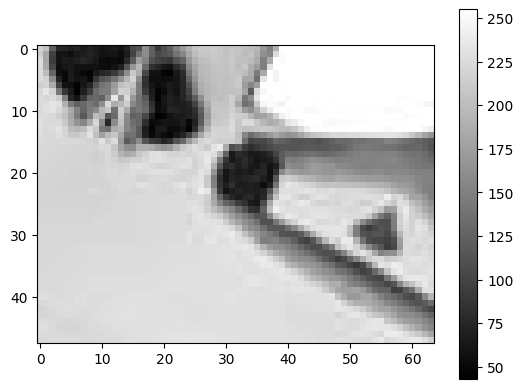

In [4]:
# display sample image 
plt.figure()
plt.imshow(X_train[0], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

Normalise data to be in a range of 0-1

In [5]:
X_train = X_train / 255
X_test = X_test / 255
X_val = X_val / 255

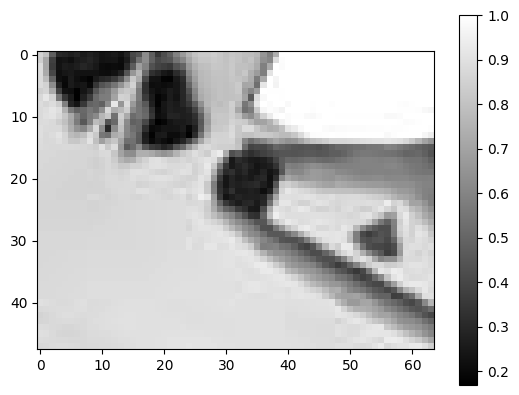

In [6]:
# check the range of the image 
plt.figure()
plt.imshow(X_train[0], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

Since images are in grayscale, add the channel

In [7]:
# add grayscale channel
X_train = X_train[...,np.newaxis]
X_test = X_test[...,np.newaxis]
X_val = X_val[...,np.newaxis]

In [8]:
print("X_train Shape :", X_train.shape)
print("X_test Shape :", X_test.shape)
print("X_val Shape :", X_val.shape)

X_train Shape : (7000, 48, 64, 1)
X_test Shape : (500, 48, 64, 1)
X_val Shape : (1000, 48, 64, 1)


Define a list of class names

In [9]:
class_name = ['Eraser','Notebook','Pen','Scissors','Tape']
class_name[y_train[2]]

'Eraser'

### CNN model 1

In [10]:
model = tf.keras.Sequential()

# (neurons, kernel, )
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(48,64,1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten()) #Convert our 3D feature maps into 1D feature vectors

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.3))

# output layer
model.add(keras.layers.Dense(5, activation='softmax'))

model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])



In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 64, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 8, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 8, 256)         2

In [12]:
hist=model.fit(X_train,y_train,epochs=15,validation_data=(X_val, y_val))

Epoch 1/15
219/219 [==============================] - 34s 154ms/step - loss: 1.6102 - accuracy: 0.1946 - val_loss: 1.5987 - val_accuracy: 0.2000
Epoch 2/15
219/219 [==============================] - 35s 162ms/step - loss: 1.5083 - accuracy: 0.3209 - val_loss: 1.3247 - val_accuracy: 0.4500
Epoch 3/15
219/219 [==============================] - 31s 142ms/step - loss: 1.3303 - accuracy: 0.4321 - val_loss: 1.1093 - val_accuracy: 0.5830
Epoch 4/15
219/219 [==============================] - 28s 128ms/step - loss: 1.1643 - accuracy: 0.5180 - val_loss: 0.9110 - val_accuracy: 0.6400
Epoch 5/15
219/219 [==============================] - 27s 123ms/step - loss: 1.0425 - accuracy: 0.5753 - val_loss: 0.7894 - val_accuracy: 0.7050
Epoch 6/15
219/219 [==============================] - 27s 122ms/step - loss: 0.9117 - accuracy: 0.6349 - val_loss: 0.7372 - val_accuracy: 0.7300
Epoch 7/15
219/219 [==============================] - 27s 124ms/step - loss: 0.8478 - accuracy: 0.6660 - val_loss: 0.6709 - val_ac

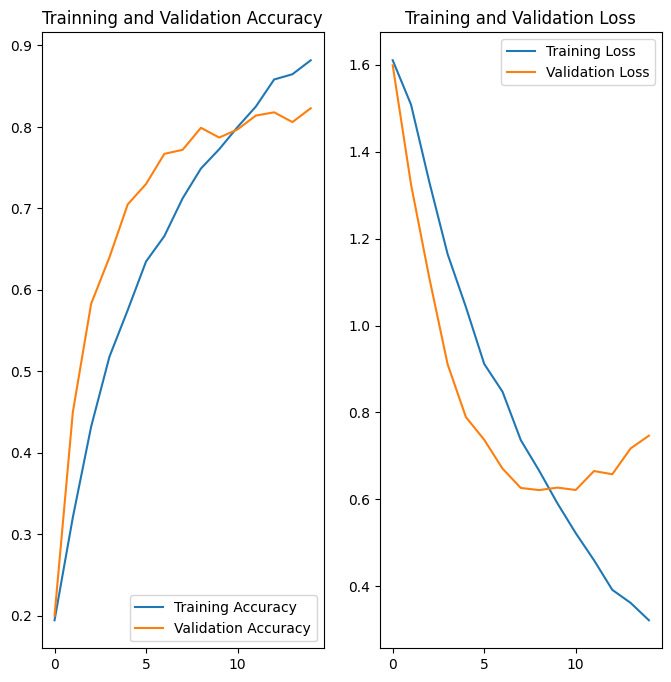

In [13]:
## add xlabel and ylabel
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(15) #number of epochs

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Trainning and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title("Training and Validation Loss")

plt.show()

In [14]:
score = model.evaluate(X_test,y_test)
score

16/16 [==============================] - 1s 34ms/step - loss: 0.7725 - accuracy: 0.8180


[0.7724756598472595, 0.8180000185966492]

In [33]:
test_predictions_ = model.predict(X_test)
test_predictions = np.argmax(test_predictions_, axis=1)
test_predictions

array([1, 2, 4, 4, 3, 1, 0, 0, 1, 3, 2, 2, 0, 3, 1, 0, 4, 1, 3, 2, 2, 3,
       4, 0, 3, 4, 2, 0, 2, 4, 2, 1, 3, 2, 0, 2, 2, 3, 2, 3, 2, 2, 0, 3,
       2, 0, 1, 2, 0, 1, 3, 2, 3, 4, 4, 0, 4, 0, 4, 1, 0, 0, 0, 1, 3, 3,
       2, 0, 4, 0, 4, 0, 3, 3, 1, 1, 1, 3, 4, 0, 2, 4, 2, 0, 3, 4, 3, 3,
       1, 2, 1, 2, 3, 3, 0, 2, 4, 1, 3, 3, 4, 3, 2, 1, 1, 4, 4, 2, 0, 2,
       4, 0, 4, 1, 0, 1, 0, 4, 1, 4, 3, 3, 0, 3, 3, 3, 2, 1, 1, 1, 4, 2,
       3, 1, 1, 3, 3, 1, 1, 4, 2, 0, 3, 2, 3, 0, 1, 2, 2, 0, 1, 4, 0, 0,
       3, 1, 0, 3, 1, 2, 1, 1, 2, 0, 4, 2, 4, 0, 4, 1, 1, 1, 4, 1, 3, 0,
       4, 1, 1, 3, 2, 1, 2, 1, 3, 4, 2, 1, 3, 1, 4, 3, 3, 1, 2, 0, 3, 4,
       0, 2, 0, 1, 3, 1, 2, 3, 0, 0, 2, 4, 3, 0, 2, 3, 3, 0, 4, 0, 2, 0,
       1, 2, 3, 2, 1, 4, 2, 2, 2, 3, 2, 0, 3, 2, 3, 1, 4, 0, 1, 2, 3, 2,
       4, 2, 4, 1, 2, 4, 4, 2, 0, 0, 4, 3, 0, 2, 0, 3, 4, 2, 2, 1, 3, 3,
       0, 3, 4, 4, 2, 3, 3, 1, 3, 0, 2, 4, 0, 2, 0, 0, 0, 3, 0, 2, 1, 3,
       3, 1, 0, 0, 2, 3, 3, 2, 3, 1, 4, 4, 3, 4, 1,

Confusion Matrix

<AxesSubplot: >

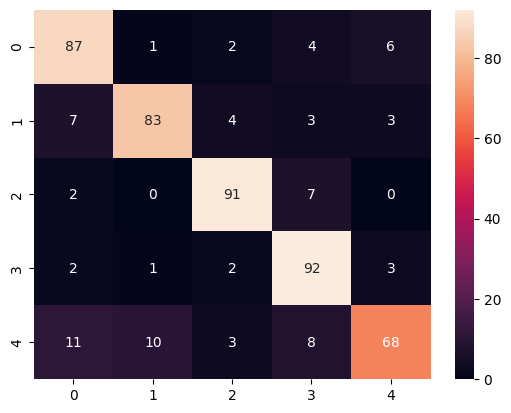

In [34]:
cm = confusion_matrix(y_test , test_predictions)
sns.heatmap(cm, annot=True)

<AxesSubplot: >

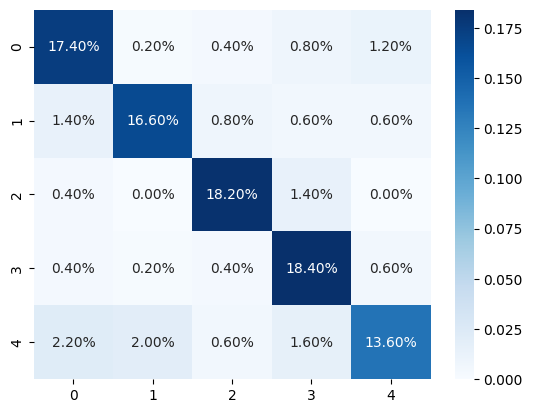

In [35]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

Classification Report

In [36]:
cr = classification_report(y_test , test_predictions)
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       100
           1       0.87      0.83      0.85       100
           2       0.89      0.91      0.90       100
           3       0.81      0.92      0.86       100
           4       0.85      0.68      0.76       100

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500

